NOTES
* jupyter nbconvert --to slides clustering.ipynb

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Generate clustering data

In [2]:
np.random.seed(0)

x1 = np.random.randn(30)
y1 = 4*x1 + 10 + np.random.randn(len(x1))

x2 = x1*10
y2 = (x2-5)**2 + np.random.randn(len(x2))*10

x3_1 = np.random.randn(10)
x3_2 = np.random.randn(10) + 2
x3_3 = np.random.randn(20) + 4

y3_1 = np.random.randn(len(x3_1))
y3_2 = np.random.randn(len(x3_2)) + 3
y3_3 = np.random.randn(len(x3_3)) + 2

x3 = np.concatenate([x3_1, x3_2, x3_3+3])
y3 = np.concatenate([y3_1, y3_2+3, y3_3])

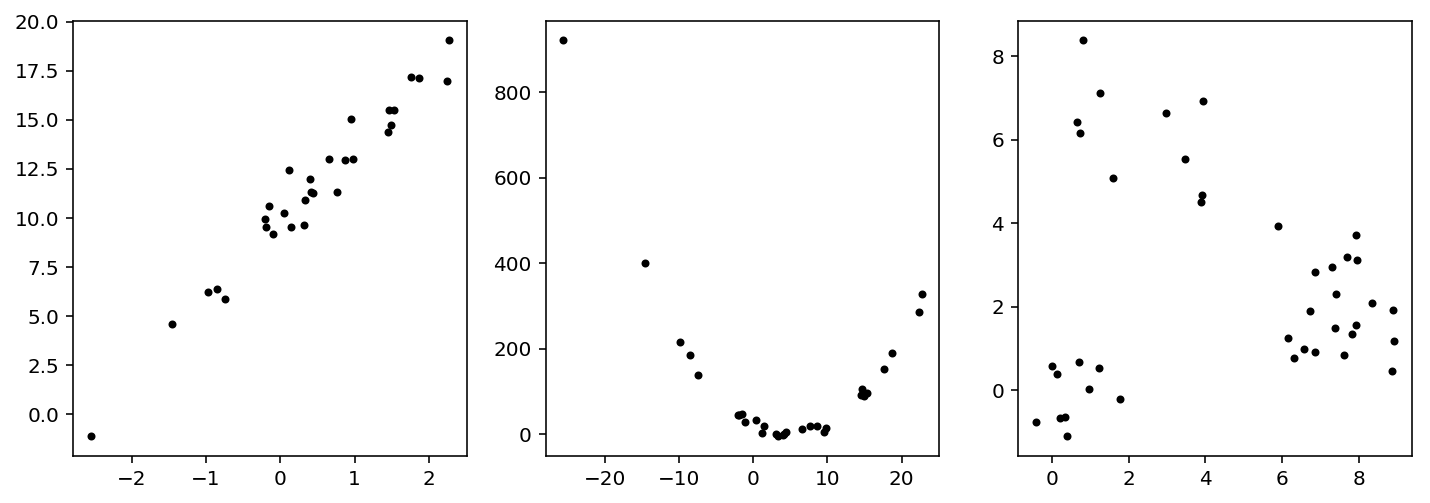

In [3]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(x1,y1,'k.')
plt.subplot(1,3,2)
plt.plot(x2,y2,'k.')
plt.subplot(1,3,3)
plt.plot(x3,y3,'k.')
plt.savefig('./images/no_line.png')

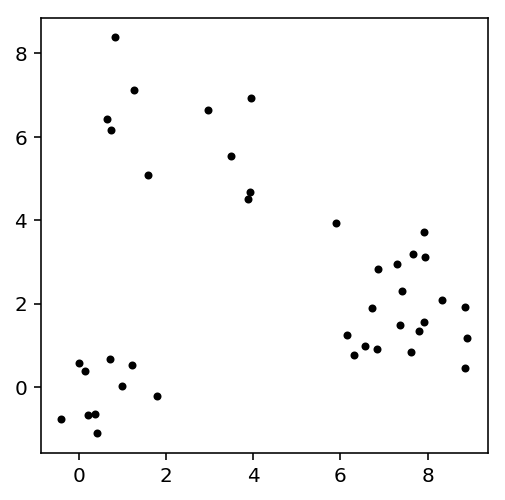

In [4]:
plt.figure(figsize=(4,4))
plt.plot(x3,y3,'k.')
plt.savefig('./images/3clusters_black.png')

In [5]:
x3 = np.concatenate([x3_1, x3_2, x3_3])
y3 = np.concatenate([y3_1, y3_2, y3_3])

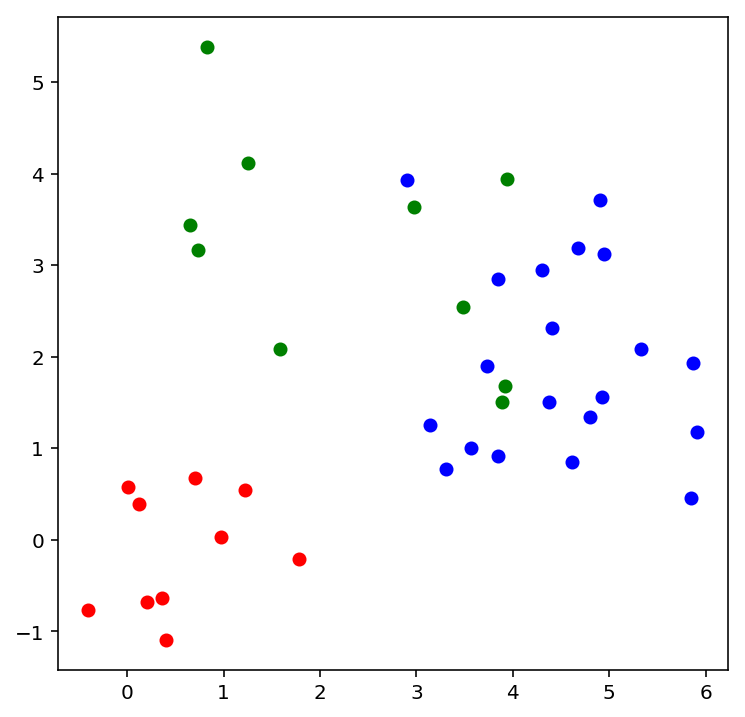

In [6]:
plt.figure(figsize=(6,6))
plt.plot(x3_1,y3_1,'r.',ms=12)
plt.plot(x3_2,y3_2,'g.',ms=12)
plt.plot(x3_3,y3_3,'b.',ms=12)
plt.savefig('./images/3clusters_1.png')

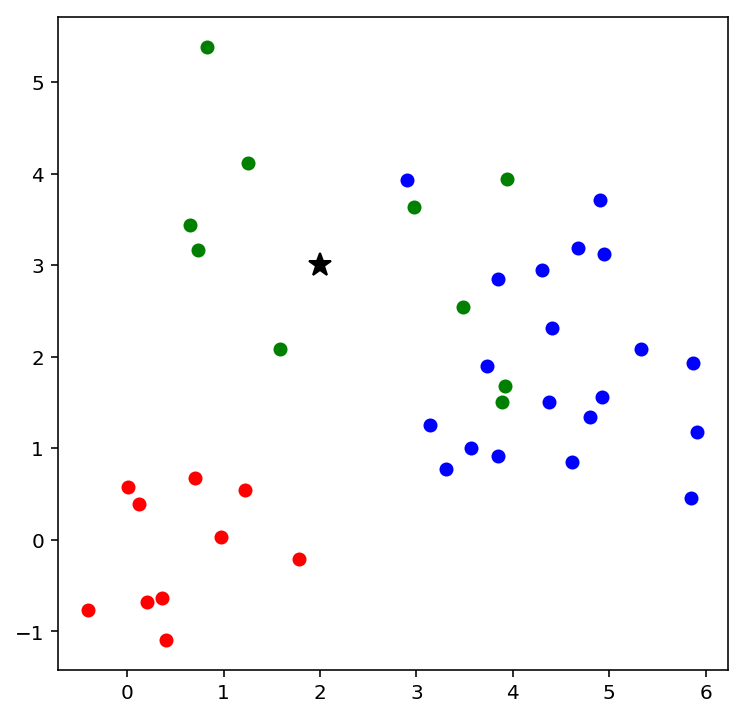

In [7]:
xnew = [2, 3]

plt.figure(figsize=(6,6))
plt.plot(x3_1,y3_1,'r.',ms=12)
plt.plot(x3_2,y3_2,'g.',ms=12)
plt.plot(x3_3,y3_3,'b.',ms=12)
plt.plot(xnew[0],xnew[1],'k*',ms=12)
plt.savefig('./images/3clusters_2.png')

# Apply kNN to clustering data

/Users/scott/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/scott/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


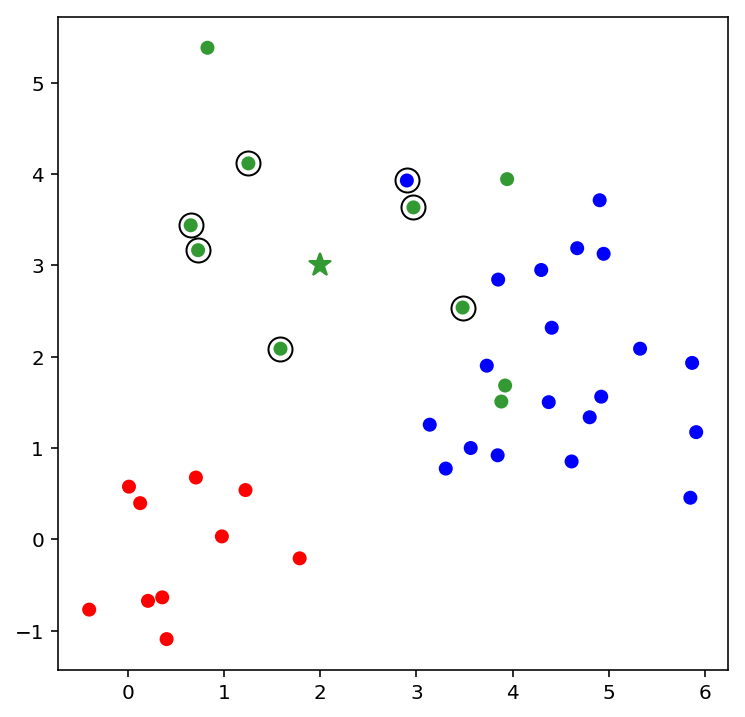

In [8]:
from sklearn import neighbors

# Prepare data
X = np.vstack((x3,y3)).T
y = np.hstack((np.ones(len(x3_1))*0, np.ones(len(x3_2))*1, np.ones(len(x3_3))*2))

# Define k
k = 7

# Initialize kNN
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X, y)

# Analyze new data point with kNN
new_class = clf.predict(xnew)
neighbs = clf.kneighbors(xnew)

# Make colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#339933', '#0000FF'])

# Plot data
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.plot(xnew[0],xnew[1],'*',ms=12, color=cmap_bold.colors[int(new_class[0])])
plt.plot(X[neighbs[1],0],X[neighbs[1],1],'ko',ms=12, mfc='none')
plt.savefig('./images/3clusters_3.png')

# Small k and large k

/Users/scott/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/scott/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/scott/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single samp

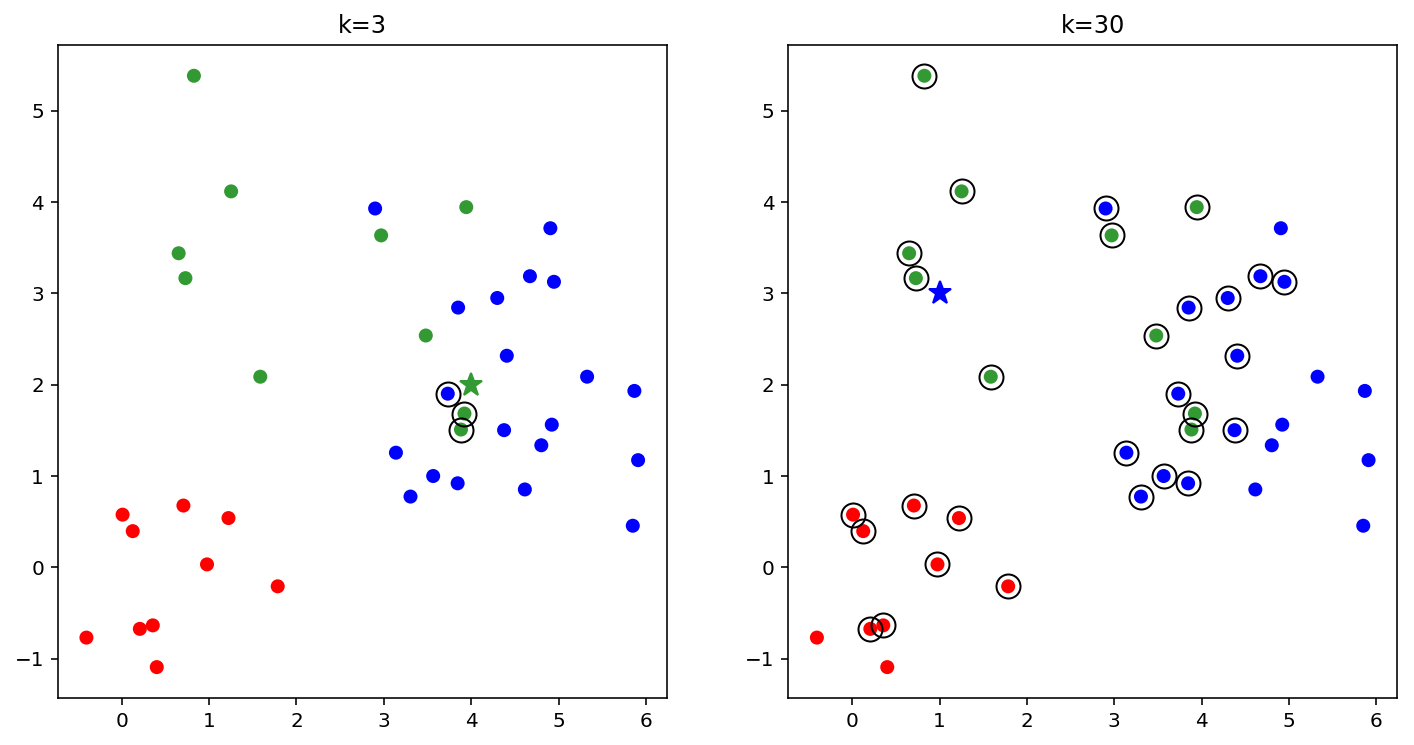

In [9]:
# Initialize small kNN
k = 3
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X, y)
xnew = [4, 2]
new_class = clf.predict(xnew)
neighbs = clf.kneighbors(xnew)

# Plot data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('k=3')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.plot(xnew[0],xnew[1],'*',ms=12, color=cmap_bold.colors[int(new_class[0])])
plt.plot(X[neighbs[1],0],X[neighbs[1],1],'ko',ms=12, mfc='none')

# Initialize large kNN
k = 30
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X, y)
xnew = [1,3]
new_class = clf.predict(xnew)
neighbs = clf.kneighbors(xnew)

# Plot data
plt.subplot(1,2,2)
plt.title('k=30')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.plot(xnew[0],xnew[1],'*',ms=12, color=cmap_bold.colors[int(new_class[0])])
plt.plot(X[neighbs[1],0],X[neighbs[1],1],'ko',ms=12, mfc='none')
plt.savefig('./images/3clusters_changek.png')

# Clustering

Scott Cole

COGS 108 - Data Science in Practice

Link to slides: bit.ly/cogs108cluster

# Not all structure in data is fit by a line

<img align="center" src="images/no_line.png"></img>

# Clusters may represent different categories

<img align="center" src="images/3clusters_1.png"></img>

# Clusters may represent different categories
- What if we want to predict the category of a new point

<img align="center" src="images/3clusters_2.png"></img>

# k Nearest Neighbors
- k Nearest Neighbors (kNN)
    * Category of a new point is the category held by the **k** nearest points
    * "instance-based learning" - does not construct a general model. Simply stores observations.

<img align="center" src="images/3clusters_3.png"></img>

# k Nearest Neighbors
- How to choose k?
- Could loop through each k

<img align="center" src="images/3clusters_changek.png"></img>

* Larger k can overcome noise, but make classification boundaries less distinct
* Probably don't want k to be greater than the number of points in any class

# kNN in python

<img align="center" src="images/3clusters_1.png" style="height: 300px;"></img>

In [10]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(7, weights = 'uniform')
clf.fit(X, y)
print(clf.predict([[0,0],[5,2]]))

[ 0.  2.]


- Also see:
    * RadiusNeighborsClassifier
    * KNeighborsRegressor

# What if we don't have labels?
- Learn structure in the data by **clustering** together similar data points

<img align="center" src="images/3clusters_black.png"></img>

# What are clusters?
- A subset of objects such that the distance between
any two objects in the cluster is less than the
distance between any object in the cluster and any
object not located inside it.
- A connected region of a multidimensional space
containing a relatively high density of objects.

[SOURCE: Stefanowski 2008](http://www.cs.put.poznan.pl/jstefanowski/sed/DM-7clusteringnew.pdf)

# What is clustering?
* Definition: the process of partitioning data into a set of meaningful sub-classes.
* Purpose: Uncover natural grouping or structure
* Multiple use cases
    * stand-alone tool to gain insight into data
    * preprocessing step for other algorithms
    * data compression
    * Outlier detection

[SOURCE: Stefanowski 2008](http://www.cs.put.poznan.pl/jstefanowski/sed/DM-7clusteringnew.pdf)

# Goal of clustering
- High intra-cluster similarity
    - Short distance between points in the same cluster
- Low inter-cluster similarity
    - Long distance between points in 2 different clusters

# Clustering is unsupervised learning

<img align="center" src="images/unsup.png"></img>

[SOURCE: Stefanowski 2008](http://www.cs.put.poznan.pl/jstefanowski/sed/DM-7clusteringnew.pdf)

# Clustering applications
- Placement of cellular towers
    * Minimize distance to users
- Pizza chain locations
    * Minimize driving distance to customers
- Marketing
    * Appeal to distinct subgroups of potential users
- Taxonomy
    * Similarity between species
    
[SOURCE: edureka](https://www.slideshare.net/EdurekaIN/applications-of-clustering-in-real-life)

# K-means clustering algorithm

1) Pick a number (K) of cluster centers - centroids (at random)

<img align="center" src="images/kmeans1.png"></img>

[SOURCE: Stefanowski 2008](http://www.cs.put.poznan.pl/jstefanowski/sed/DM-7clusteringnew.pdf)

# K-means clustering algorithm
2) Assign every item to its nearest cluster center (e.g. using Euclidean distance)

<img align="center" src="images/kmeans2.png"></img>

[SOURCE: Stefanowski 2008](http://www.cs.put.poznan.pl/jstefanowski/sed/DM-7clusteringnew.pdf)

# K-means clustering algorithm
3) Move each cluster center to the mean of its assigned items

<img align="center" src="images/kmeans3.png"></img>

[SOURCE: Stefanowski 2008](http://www.cs.put.poznan.pl/jstefanowski/sed/DM-7clusteringnew.pdf)

# K-means clustering algorithm
4) Repeat steps **2**,3 until convergence (change in cluster assignments less than a threshold)

<img align="center" src="images/kmeans5.png"></img>

[SOURCE: Stefanowski 2008](http://www.cs.put.poznan.pl/jstefanowski/sed/DM-7clusteringnew.pdf)

# K-means clustering algorithm
4) Repeat steps 2,**3** until convergence (change in cluster assignments less than a threshold)

<img align="center" src="images/kmeans6.png"></img>

[SOURCE: Stefanowski 2008](http://www.cs.put.poznan.pl/jstefanowski/sed/DM-7clusteringnew.pdf)

# K-means clustering: Final result

<img align="center" src="images/kmeans7.png"></img>

[SOURCE: Stefanowski 2008](http://www.cs.put.poznan.pl/jstefanowski/sed/DM-7clusteringnew.pdf)

# How to choose value of k?

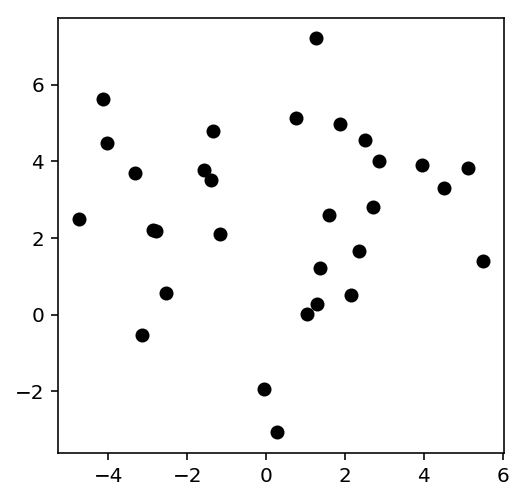

In [11]:
from sklearn.datasets import make_blobs
plt.figure(figsize=(4,4))
X, y = make_blobs(n_samples=30, n_features=2, centers=3, cluster_std=2, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c='k')
plt.show()

# How to choose value of k?
* Elbow method

<img align="center" src="images/elbow.png"></img>

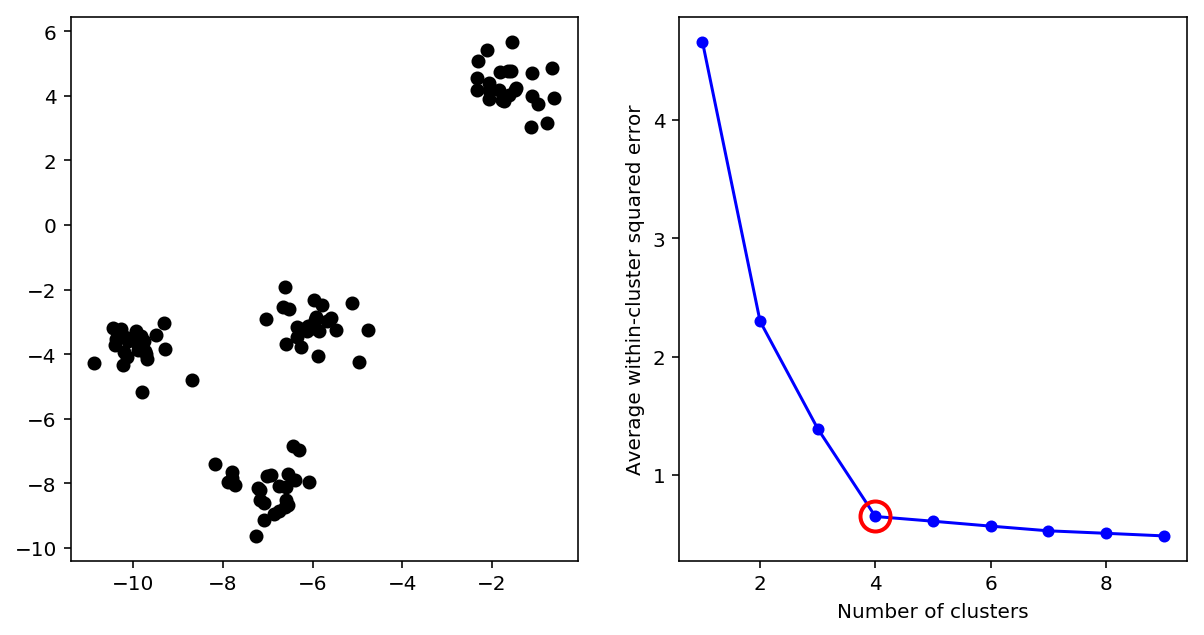

In [12]:
# Generate fake data
X, y = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=.6, random_state=1)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c='k')

# Fit clusters for various numbers of clusters
from sklearn.cluster import KMeans
K = range(1,10)
KM = [KMeans(n_clusters=k, random_state=0).fit(X) for k in K]
centroids = [km.cluster_centers_ for km in KM]   # cluster centroids

# Compute average euclidean distance between each point and its cluster centroid
from scipy.spatial.distance import cdist
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

plt.subplot(1,2,2)
kIdx = 3
plt.plot(K, avgWithinSS, 'b.-', ms=10)
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=15, mew=2, mec='r', mfc='None')
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster squared error')
plt.savefig('images/elbow.png')
plt.show()

# How to choose value of k?
* Elbow method

<img align="center" src="images/noelbow.png"></img>

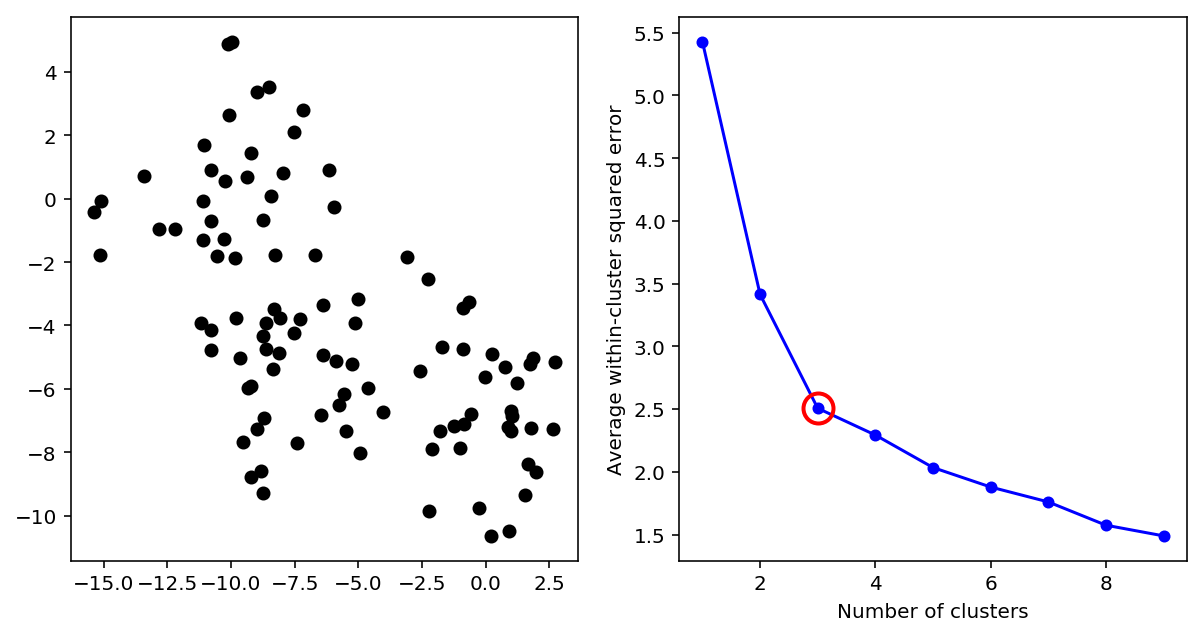

In [13]:
# Generate fake data
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=2, random_state=9)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c='k')

# Fit clusters for various numbers of clusters
K = range(1,10)
KM = [KMeans(n_clusters=k, random_state=0).fit(X) for k in K]
centroids = [km.cluster_centers_ for km in KM]   # cluster centroids

# Compute average euclidean distance between each point and its cluster centroid
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

plt.subplot(1,2,2)
kIdx = 2
plt.plot(K, avgWithinSS, 'b.-', ms=10)
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=15, mew=2, mec='r', mfc='None')
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster squared error')
plt.savefig('images/noelbow.png')
plt.show()

# Results differ with random seed

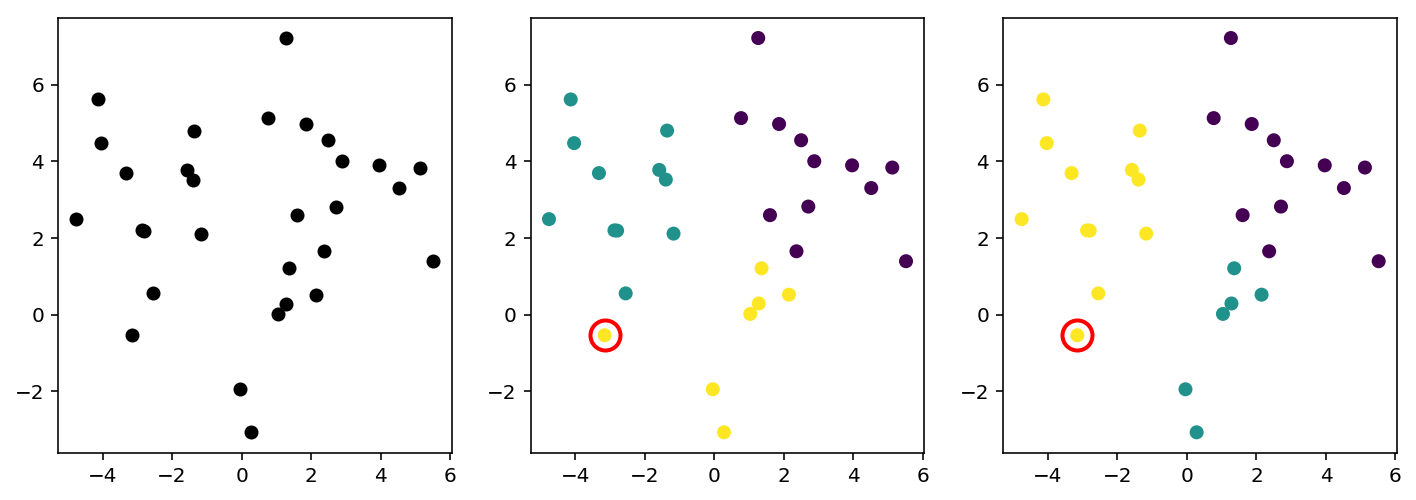

In [14]:
# Generate fake data
X, y = make_blobs(n_samples=30, n_features=2, centers=3, cluster_std=2, random_state=0)
# Predict clusters using 2 different random seeds
y_pred = KMeans(n_clusters=3, max_iter=1, random_state=0).fit_predict(X)
y_pred2 = KMeans(n_clusters=3, max_iter=1, random_state=1).fit_predict(X)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], c='k')
plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.plot(X[18,0], X[18,1], marker='o', markersize=15, mew=2, mec='r', mfc='None')
plt.subplot(1,3,3)
plt.scatter(X[:, 0], X[:, 1], c=y_pred2)
plt.plot(X[18,0], X[18,1], marker='o', markersize=15, mew=2, mec='r', mfc='None')
plt.show()

# Results differ with random seed
* But can run many iterations (random initializations)

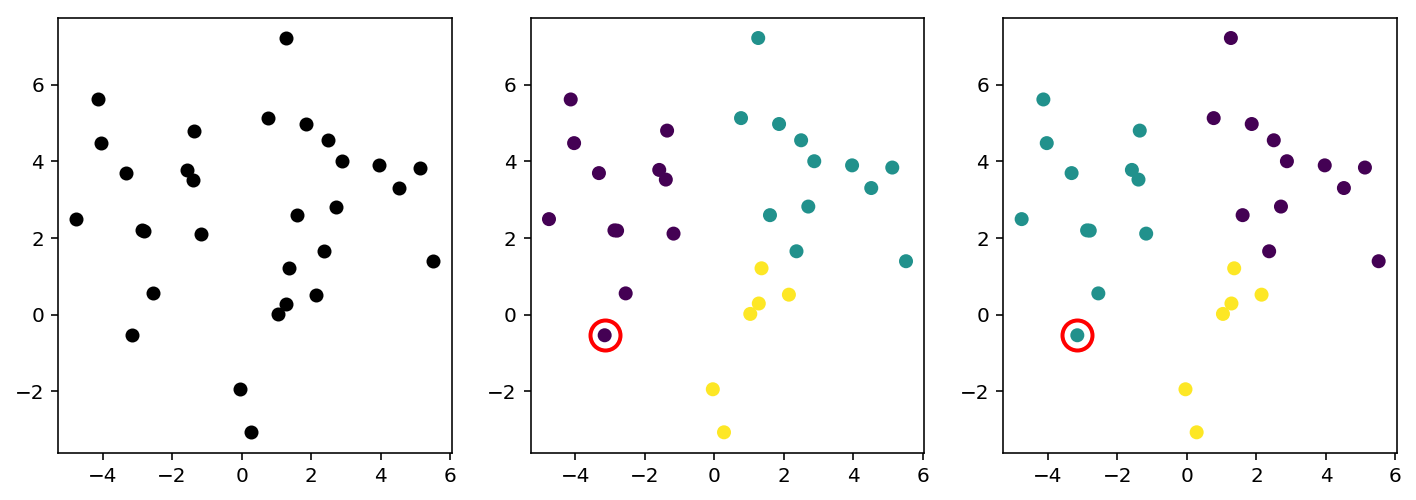

In [15]:
X, y = make_blobs(n_samples=30, n_features=2, centers=3, cluster_std=2, random_state=0)
# Predict clusters using 2 different random seeds
y_pred = KMeans(n_clusters=3, max_iter=100, random_state=0).fit_predict(X)
y_pred2 = KMeans(n_clusters=3, max_iter=100, random_state=1).fit_predict(X)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], c='k')
plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.plot(X[18,0], X[18,1], marker='o', markersize=15, mew=2, mec='r', mfc='None')
plt.subplot(1,3,3)
plt.scatter(X[:, 0], X[:, 1], c=y_pred2)
plt.plot(X[18,0], X[18,1], marker='o', markersize=15, mew=2, mec='r', mfc='None')
plt.show()

# Limitations of k-Means

<img align="center" src="images/limit.png"  style="height: 700px;"></img>

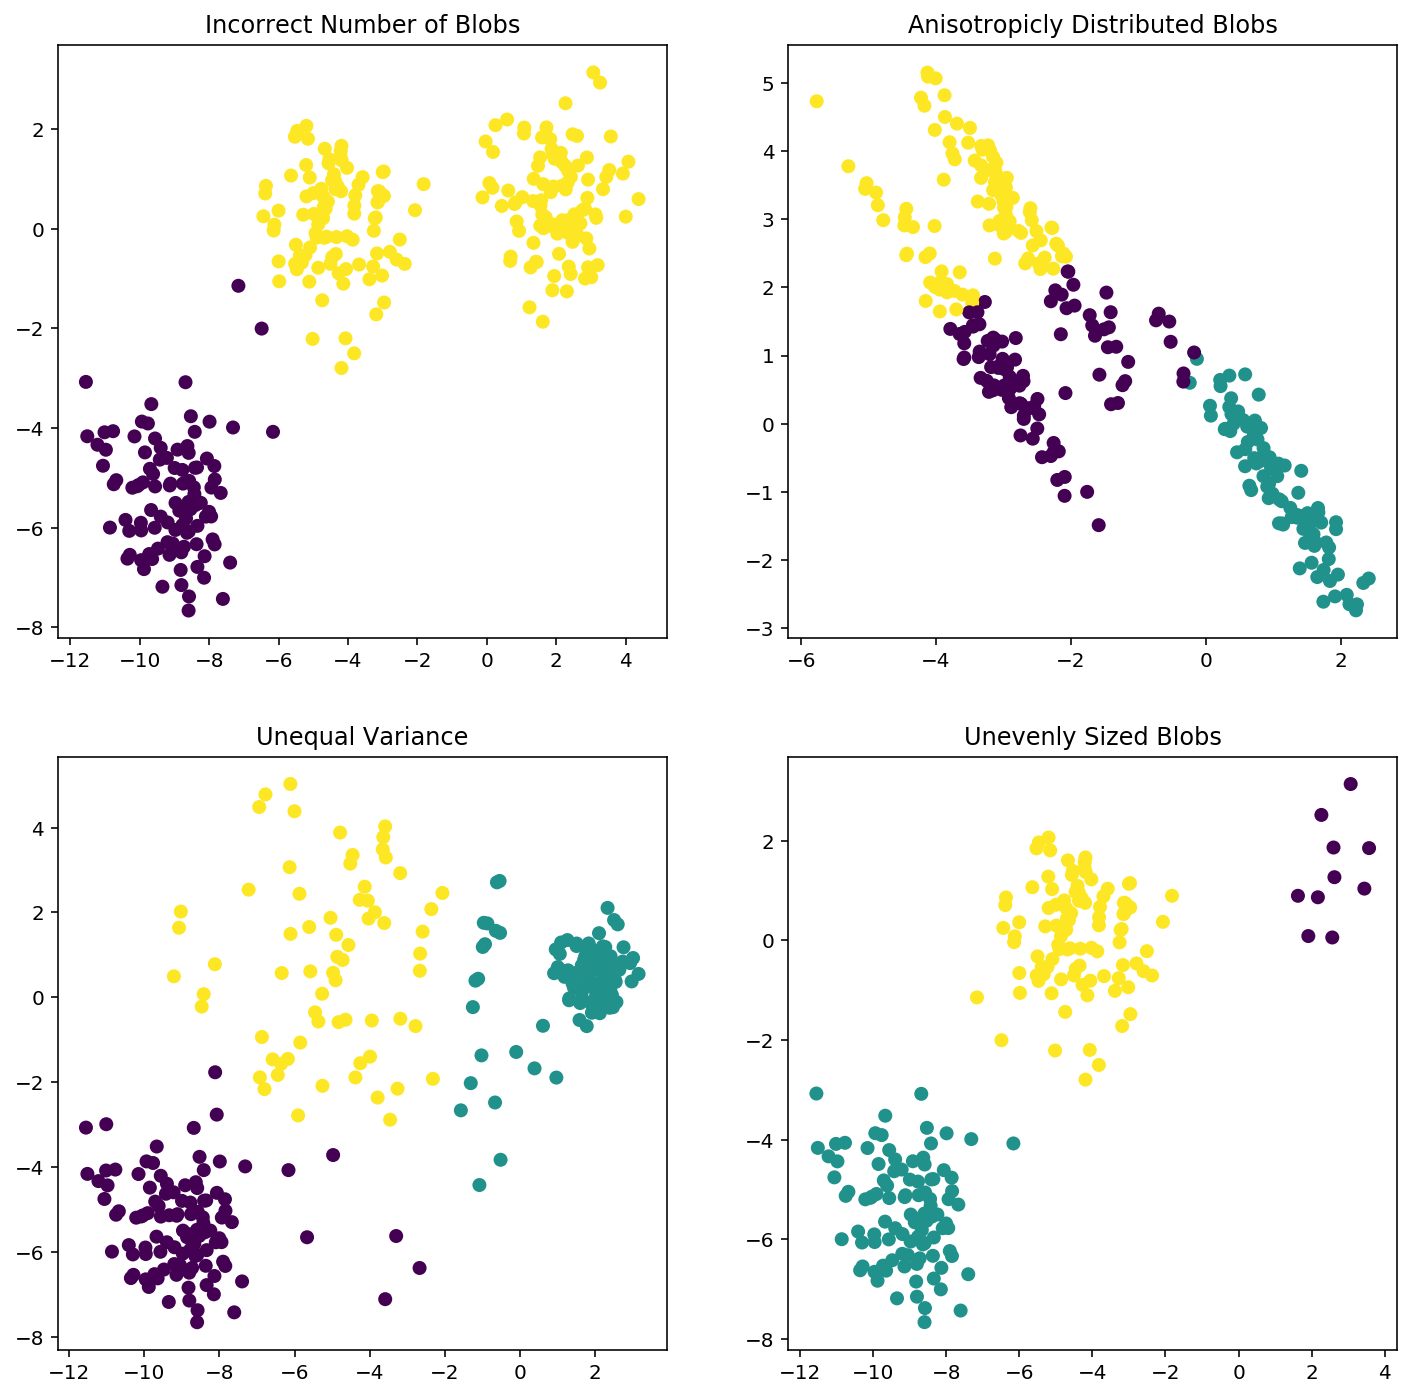

In [16]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 300
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")
plt.savefig('images/limit.png')

plt.show()

# Clustering accuracy
* Requires labels
* Compare different algorithms or hyperparameters
* Percentage of data points in the same cluster that share common label

# K-means clustering
Advantages
* Simple, understandable
* items automatically
assigned to clusters

Disadvantages
* Must pick number of
clusters before hand
* Often terminates at a
local optimum.
* All items forced into a
cluster
* Too sensitive to outliers

[SOURCE: Stefanowski 2008](http://www.cs.put.poznan.pl/jstefanowski/sed/DM-7clusteringnew.pdf)

# Some other clustering options
* K-Medoids
    * Move cluster to the centrally located point in each cluster
    * $Median(S) = argmin_{x}(\sum_{sâˆˆS}(|s-x|)$
* Hierarchical clustering

<img align="center" src="images/hierarchical.png"></img>
    
[SOURCE: Janssen et al.](https://www.researchgate.net/figure/273456906_fig3_Figure-4-Example-of-hierarchical-clustering-clusters-are-consecutively-merged-with-the)